<a href="https://colab.research.google.com/github/flyaflya/persuasive/blob/main/demoNotebooks/Intro_to_Daft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Directed Acyclic Graphs

Here is a visual representation of something mathematicians call a directed acyclic graph (DAG):

![](https://docs.daft-pgm.org/en/latest/_images/fe7ebe13550ccb0d919ae3183576ccbbb3e01d556f1e7832ebc4019d85a5c72c.png)

Superficially, they are aesthetically pleasing combinations of ellipses, rectangles, and text.  During our course, we will learn they are rigorous representations of data-generating processes that are simultaneously understandable by non-technical stakeholders and rigorously defined so that we can represent data-generating processes in computer code.

For now, we will just learn about Python by drawing superficially pleasing DAGs.

# Packages in Colab

We will use the `daft` package to draw DAGs.  Colab comes preconfigured with lots of great data science packages - including `daft`.  In fact, the primary reason we are using Colab is that it greatly simplifies package maintenance for us, sometimes an enormous source of pain.  

![](https://preview.redd.it/2o8wlapqk5h31.png?width=492&format=png&auto=webp&s=aff6c993cdfcceff2080731993ef6ba6ec67af25)

If we were to google "list installed packages python", we would inevitably find this command can help:

```
pip list
```

*([sample instructions from Internet](https://www.activestate.com/resources/quick-reads/how-to-list-installed-python-packages/) )*

So, let's try `pip list`, but we put an exclamation point in front of it to tell Colab that THIS IS A COMMAND LINE TOOL which we want executed on the operating system.  Skim through ["Data Science at The Command Line"](https://datascienceatthecommandline.com/2e/) to learn more.  Now, we move on to using `pip list`.

In [ ]:
!pip list #use ! to run shell commands, i.e. not python, operating system / terminal / shell types of commands
# see here for more info: https://www.reddit.com/r/learnprogramming/comments/6xr0l9/whats_the_difference_between_terminal_shell/

Notice, `daft==0.0.4` is installed.  Great, let's use it!!!

# First Attempt To Use `daft`

In order to use the package, let's find the documentation and try it out!  Below are the first two lines of some sample code from [the `daft` documentation](https://docs.daft-pgm.org/en/latest/examples/classic/):

In [7]:
import daft

# Instantiate the PGM.
pgm = daft.PGM()



TypeError: ignored

**I HATE COMPUTERS RIGHT NOW --- WHAT IS WITH THIS ERROR!!!!**

![](https://media.giphy.com/media/3oFzmqXMDtHH8vEVhe/giphy.gif)


# Learning to Embrace The Productive Struggle
Alright, I will take some deep breaths.

In [8]:
# view the help documentation
?daft.PGM

From the help documentation, I can see that `shape` and `origin` are required arguments.  How does the help documentation on the Internet get away without using them?  Let's visit the `daft` github page (where the source code is stored) and see if we can make heads or tails of things.  Here is the github link: https://github.com/daft-dev/daft.  We should search for any issues having the "positional argument" error.  We should also check what version is the last release.

Check it out!  Our exact issue has been experienced by someone else [on Github (issue #135)](https://github.com/daft-dev/daft/issues/135).  I am starting to feel relief.  They even suggested a fix!!  Let's try upgrading our daft.

In [10]:
!pip install daft --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: daft
    Found existing installation: daft 0.0.4
    Uninstalling daft-0.0.4:
      Successfully uninstalled daft-0.0.4


We better restart the runtime (i.e. start a new session of Python) as suggested.

Now, scroll back up to the cell where we got the error and see if its fixed.  You will see that it works!!  Yay.  I am a wizard.
![](https://www.cnet.com/a/img/resize/0165e20206047e2ebe322821b4fea5fdff7f3061/hub/2014/12/01/89601d70-ca65-4dc7-adfe-f6dbd46d05ba/hobbit-lotr-5-armies-gandalf-hat.jpg?auto=webp&fit=crop&height=675&width=1200)

Back to the example code:


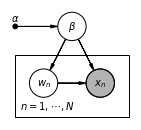

In [1]:
import daft

# Instantiate the PGM.
pgm = daft.PGM()

# Hierarchical parameters.
pgm.add_node("alpha", r"$\alpha$", 0.5, 2, fixed=True)
pgm.add_node("beta", r"$\beta$", 1.5, 2)

# Latent variable.
pgm.add_node("w", r"$w_n$", 1, 1)

# Data.
pgm.add_node("x", r"$x_n$", 2, 1, observed=True)

# Add in the edges.
pgm.add_edge("alpha", "beta")
pgm.add_edge("beta", "w")
pgm.add_edge("w", "x")
pgm.add_edge("beta", "x")

# And a plate.
pgm.add_plate([0.5, 0.5, 2, 1], label=r"$n = 1, \cdots, N$", shift=-0.1)

# Render and save.
pgm.render()

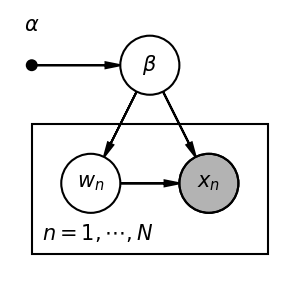

In [3]:
## to get it bigger, change the dpi argument.  
## See help documentation here: https://docs.daft-pgm.org/en/latest/api/#the-rendering-context
pgm.render(dpi=150)

In [4]:
## note, this is an object-oriented workflow
## there is object called pgm
## we can see it of the daft.PGM (class types are often capitalized)
type(pgm)

daft.PGM

You can use auto-complete to see methods by typing `pgm.` and waiting for a pop-up list of methods.  Note: code completions and documentation hints occur automatically while you type.

Use the following keyboard shortcuts:
 - `Ctrl-space` to re-open completions.
 - `Ctrl-shift-space` to re-open parameter hints.

In [ ]:
pgm.    

# Your Turn To Try To Figure Things Out

Use the documentation available at https://docs.daft-pgm.org/en/latest/api/ to figure out how to reproduce these two images:

![](https://raw.githubusercontent.com/flyaflya/persuasive/main/images/fig-newsvOval-1.png) ![](https://raw.githubusercontent.com/flyaflya/persuasive/main/images/fig-newsvRect-3.png)

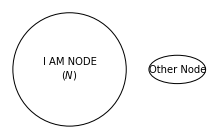

In [12]:
## here is some skeleton code to get started
# Instantiate the PGM.
pgm = daft.PGM()

# Hierarchical parameters.
nodeNameString = "I AM NODE\n" + r"$(N)$"
pgm.add_node(node = "node", content = nodeNameString, x = 0.5, y = 2, scale = 4)
pgm.add_node(node = "node2", content = "Other Node", x = 2.4, y = 2, aspect = 2)

# show pgm
pgm.show()